In [1]:
import pandas as pd
import random

# Generate random values for the dataset
data = []

for _ in range(100):  # Generating 100 rows
    # Randomly select Ambient Light Level, Time of Day, and Room Occupancy
    ambient_light = random.choice(['Low', 'Medium', 'High'])
    time_of_day = random.choice(['Morning', 'Afternoon', 'Evening'])
    room_occupancy = random.choice(['Yes', 'No'])

    # Determine the Brightness Level based on fuzzy rules
    if room_occupancy == 'Yes':
        if ambient_light == 'Low':
            brightness = 'High'
        elif ambient_light == 'Medium':
            if time_of_day == 'Afternoon':
                brightness = 'Medium'
            else:
                brightness = 'Low'
        elif ambient_light == 'High':
            brightness = 'Low'
    else:  # Room is not occupied
        brightness = 'Off'

    # Append the row to the dataset
    data.append([ambient_light, time_of_day, room_occupancy, brightness])

# Convert the list into a DataFrame
df = pd.DataFrame(data, columns=['Ambient Light Level', 'Time of Day', 'Room Occupancy', 'Brightness Level'])

# Save the dataset as a CSV
df.to_csv('smart_lighting_dataset.csv', index=False)

# Display the dataset
print(df.head())


  Ambient Light Level Time of Day Room Occupancy Brightness Level
0              Medium     Morning             No              Off
1              Medium     Morning             No              Off
2              Medium     Morning            Yes              Low
3              Medium     Morning             No              Off
4                High     Morning             No              Off


In [18]:
# Daftar pustaka yang digunakan
requirements = """
pandas==1.5.0
numpy==1.23.1
matplotlib==3.6.0
seaborn==0.11.2
"""

# Menyimpan ke dalam file requirements.txt
with open("/content/requirements.txt", "w") as f:
    f.write(requirements)


In [2]:
pip install scikit-fuzzy matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.0 MB/s eta 0:00:00


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('smart_lighting_dataset.csv')

# Display the first few rows
print(df.head())


  Ambient Light Level Time of Day Room Occupancy Brightness Level
0              Medium     Morning             No              Off
1              Medium     Morning             No              Off
2              Medium     Morning            Yes              Low
3              Medium     Morning             No              Off
4                High     Morning             No              Off


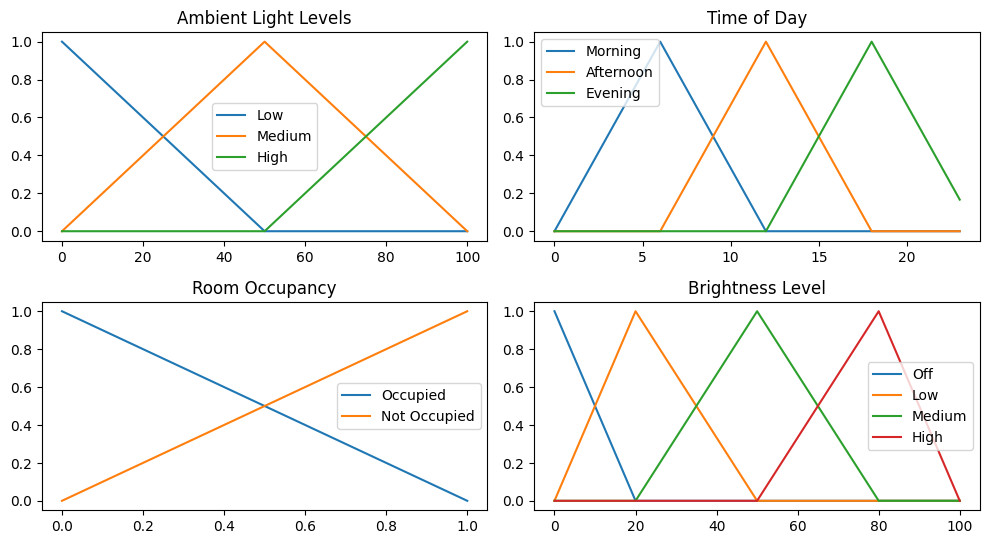

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define the universe of discourse (ranges for the inputs and output)
ambient_light = np.arange(0, 101, 1)  # 0 to 100% light
time_of_day = np.arange(0, 24, 1)  # 0 to 23 hours
room_occupancy = np.arange(0, 2, 1)  # 0 = Not Occupied, 1 = Occupied
brightness = np.arange(0, 101, 1)  # Brightness range from 0 to 100%

# Membership functions for ambient light (Low, Medium, High)
ambient_light_low = fuzz.trimf(ambient_light, [0, 0, 50])
ambient_light_medium = fuzz.trimf(ambient_light, [0, 50, 100])
ambient_light_high = fuzz.trimf(ambient_light, [50, 100, 100])

# Membership functions for time of day (Morning, Afternoon, Evening)
time_morning = fuzz.trimf(time_of_day, [0, 6, 12])
time_afternoon = fuzz.trimf(time_of_day, [6, 12, 18])
time_evening = fuzz.trimf(time_of_day, [12, 18, 24])

# Membership functions for room occupancy (Occupied, Not Occupied)
room_occupied = fuzz.trimf(room_occupancy, [0, 0, 1])  # Occupied: 0 and 1 as edges
room_not_occupied = fuzz.trimf(room_occupancy, [0, 1, 1])  # Not Occupied: 0 and 1 as edges

# Membership functions for brightness (Off, Low, Medium, High)
brightness_off = fuzz.trimf(brightness, [0, 0, 20])
brightness_low = fuzz.trimf(brightness, [0, 20, 50])
brightness_medium = fuzz.trimf(brightness, [20, 50, 80])
brightness_high = fuzz.trimf(brightness, [50, 80, 100])

# Plot the membership functions to visualize them
plt.figure(figsize=(10, 8))

# Plot for ambient light
plt.subplot(3, 2, 1)
plt.plot(ambient_light, ambient_light_low, label='Low')
plt.plot(ambient_light, ambient_light_medium, label='Medium')
plt.plot(ambient_light, ambient_light_high, label='High')
plt.title("Ambient Light Levels")
plt.legend()

# Plot for time of day
plt.subplot(3, 2, 2)
plt.plot(time_of_day, time_morning, label='Morning')
plt.plot(time_of_day, time_afternoon, label='Afternoon')
plt.plot(time_of_day, time_evening, label='Evening')
plt.title("Time of Day")
plt.legend()

# Plot for room occupancy
plt.subplot(3, 2, 3)
plt.plot(room_occupancy, room_occupied, label='Occupied')
plt.plot(room_occupancy, room_not_occupied, label='Not Occupied')
plt.title("Room Occupancy")
plt.legend()

# Plot for brightness levels
plt.subplot(3, 2, 4)
plt.plot(brightness, brightness_off, label='Off')
plt.plot(brightness, brightness_low, label='Low')
plt.plot(brightness, brightness_medium, label='Medium')
plt.plot(brightness, brightness_high, label='High')
plt.title("Brightness Level")
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
from skfuzzy import control as ctrl

# Define fuzzy inputs (Antecedents)
ambient_light_input = ctrl.Antecedent(np.arange(0, 101, 1), 'ambient_light')
time_of_day_input = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')
room_occupancy_input = ctrl.Antecedent(np.arange(0, 2, 1), 'room_occupancy')

# Define fuzzy output (Consequent)
brightness_output = ctrl.Consequent(np.arange(0, 101, 1), 'brightness')

# Membership functions for inputs
ambient_light_input['low'] = fuzz.trimf(ambient_light, [0, 0, 50])
ambient_light_input['medium'] = fuzz.trimf(ambient_light, [0, 50, 100])
ambient_light_input['high'] = fuzz.trimf(ambient_light, [50, 100, 100])

time_of_day_input['morning'] = fuzz.trimf(time_of_day, [0, 6, 12])
time_of_day_input['afternoon'] = fuzz.trimf(time_of_day, [6, 12, 18])
time_of_day_input['evening'] = fuzz.trimf(time_of_day, [12, 18, 24])

room_occupancy_input['occupied'] = fuzz.trimf(room_occupancy, [0, 1, 1])
room_occupancy_input['not_occupied'] = fuzz.trimf(room_occupancy, [0, 0, 1])

brightness_output['off'] = fuzz.trimf(brightness, [0, 0, 20])
brightness_output['low'] = fuzz.trimf(brightness, [0, 20, 50])
brightness_output['medium'] = fuzz.trimf(brightness, [20, 50, 80])
brightness_output['high'] = fuzz.trimf(brightness, [50, 80, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(ambient_light_input['low'] & room_occupancy_input['occupied'], brightness_output['high'])
rule2 = ctrl.Rule(ambient_light_input['medium'] & time_of_day_input['afternoon'], brightness_output['medium'])
rule3 = ctrl.Rule(ambient_light_input['high'] & time_of_day_input['evening'], brightness_output['low'])
rule4 = ctrl.Rule(room_occupancy_input['not_occupied'], brightness_output['off'])

# Control system and simulation
brightness_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
brightness_simulation = ctrl.ControlSystemSimulation(brightness_ctrl)


In [9]:
# Input values for the simulation
brightness_simulation.input['ambient_light'] = 20
brightness_simulation.input['time_of_day'] = 16
brightness_simulation.input['room_occupancy'] = 1

# Compute the output
brightness_simulation.compute()
print(f"Recommended Brightness Level: {brightness_simulation.output['brightness']}")


Recommended Brightness Level: 64.58064516129029


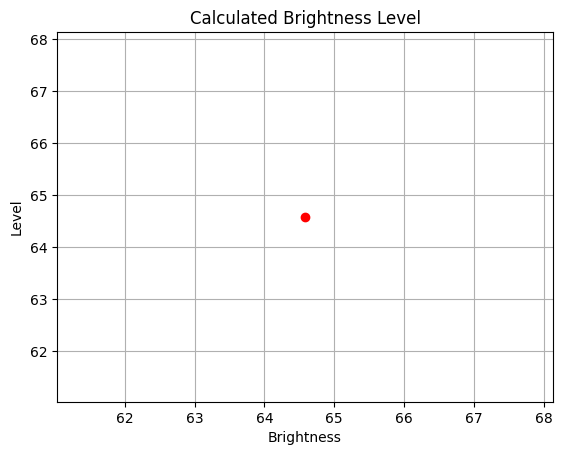

Recommended Brightness Level: 64.58064516129029


In [11]:
# Menyimpan nilai output kecerahan
brightness_value = brightness_simulation.output['brightness']

# Plotting nilai output kecerahan sebagai titik tunggal pada grafik
plt.plot(brightness_value, brightness_value, 'ro')  # 'ro' berarti titik merah
plt.title("Calculated Brightness Level")
plt.xlabel("Brightness")
plt.ylabel("Level")
plt.grid(True)
plt.show()

# Menampilkan hasilnya
print(f"Recommended Brightness Level: {brightness_value}")


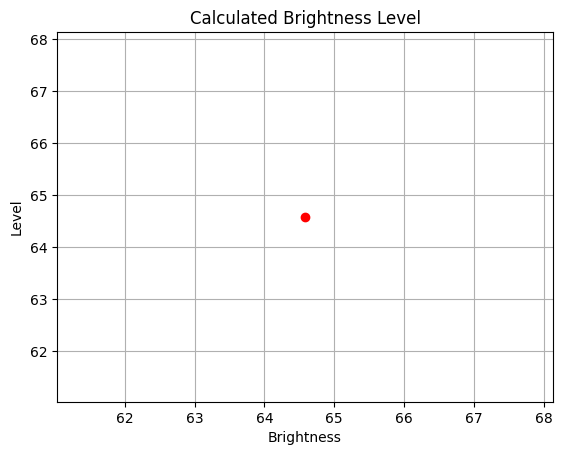

Recommended Brightness Level: 64.58064516129029


In [13]:
# Mendapatkan nilai output kecerahan
brightness_value = brightness_simulation.output['brightness']

# Plotting output brightness as a single point
plt.plot(brightness_value, brightness_value, 'ro')  # 'ro' = red dot
plt.title("Calculated Brightness Level")
plt.xlabel("Brightness")
plt.ylabel("Level")
plt.grid(True)
plt.show()

# Display the calculated brightness value
print(f"Recommended Brightness Level: {brightness_value}")


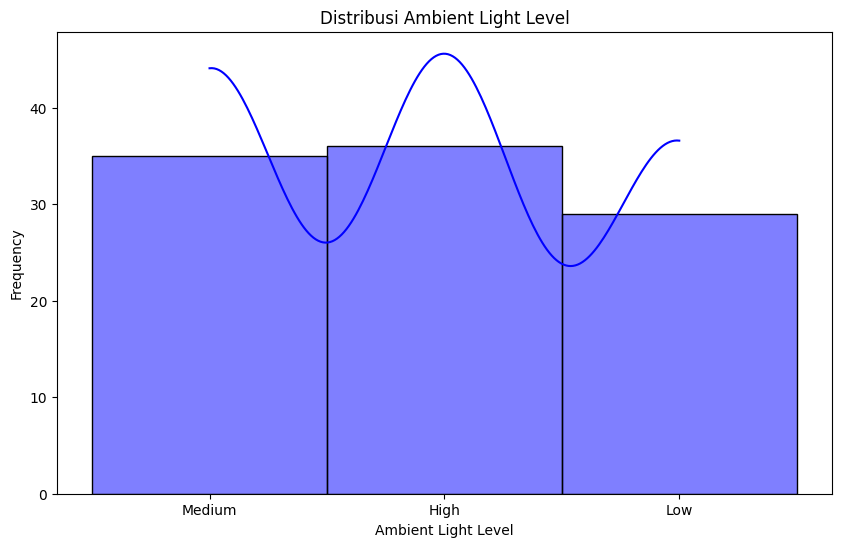

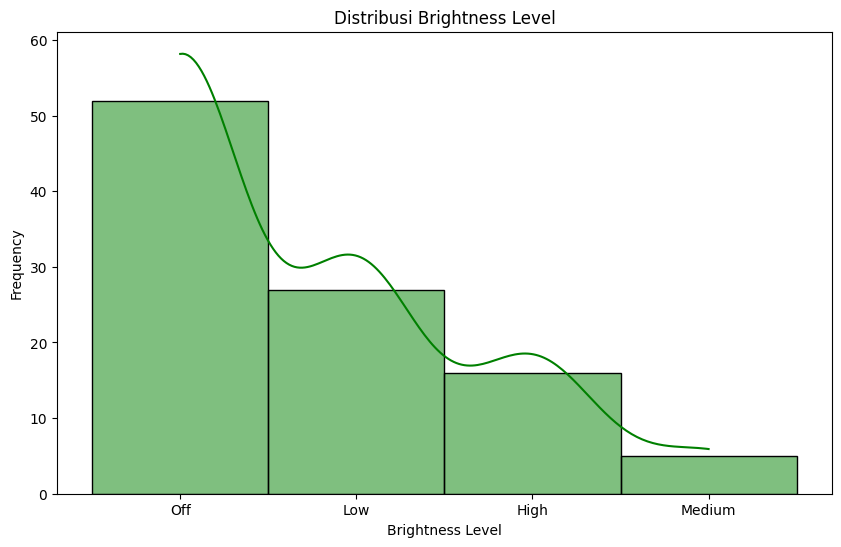

In [15]:
import seaborn as sns

# Plot distribusi dari kolom input (seperti Ambient Light Level)
plt.figure(figsize=(10, 6))
sns.histplot(df['Ambient Light Level'], kde=True, color='blue')
plt.title("Distribusi Ambient Light Level")
plt.xlabel("Ambient Light Level")
plt.ylabel("Frequency")
plt.show()

# Plot distribusi dari kolom output (Brightness Level)
plt.figure(figsize=(10, 6))
sns.histplot(df['Brightness Level'], kde=True, color='green')
plt.title("Distribusi Brightness Level")
plt.xlabel("Brightness Level")
plt.ylabel("Frequency")
plt.show()
